# Ejercicio 2

## Punto 2. 

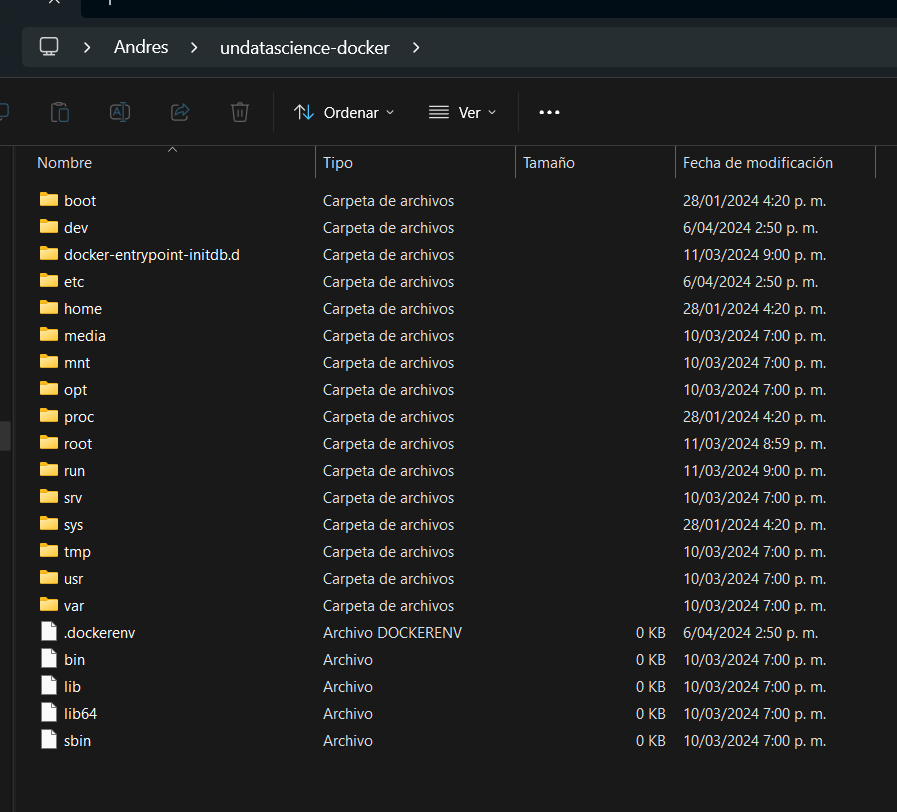

## Punto 3. 

Docker:

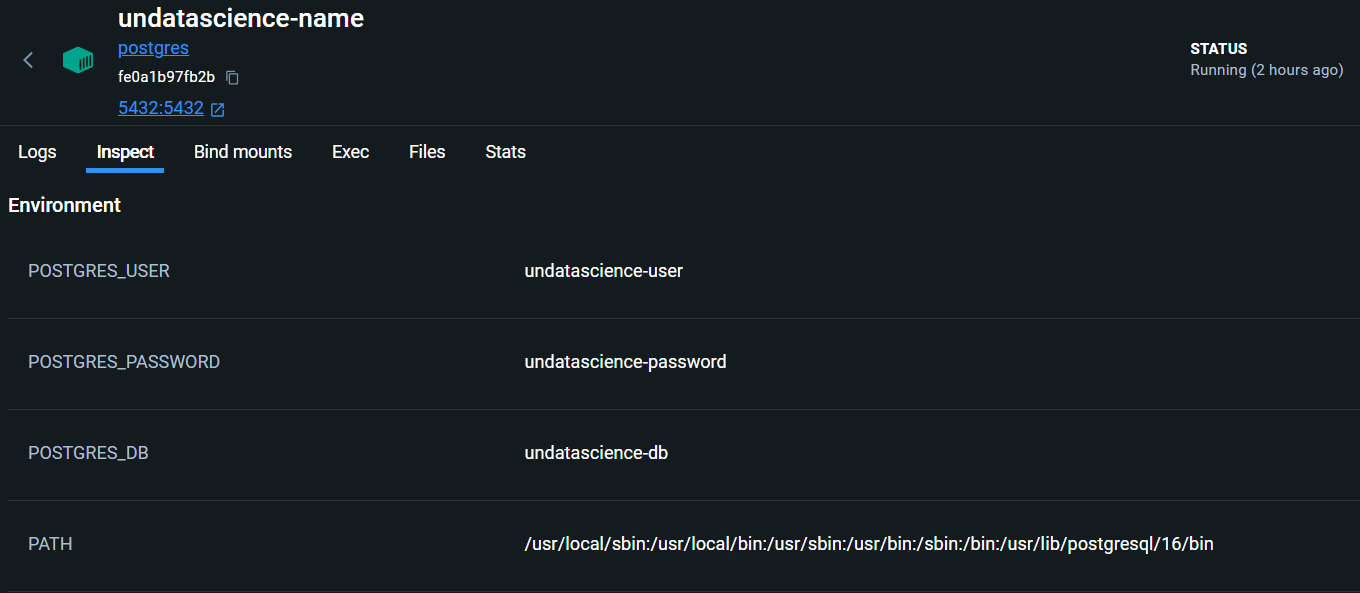

pgAdmin:

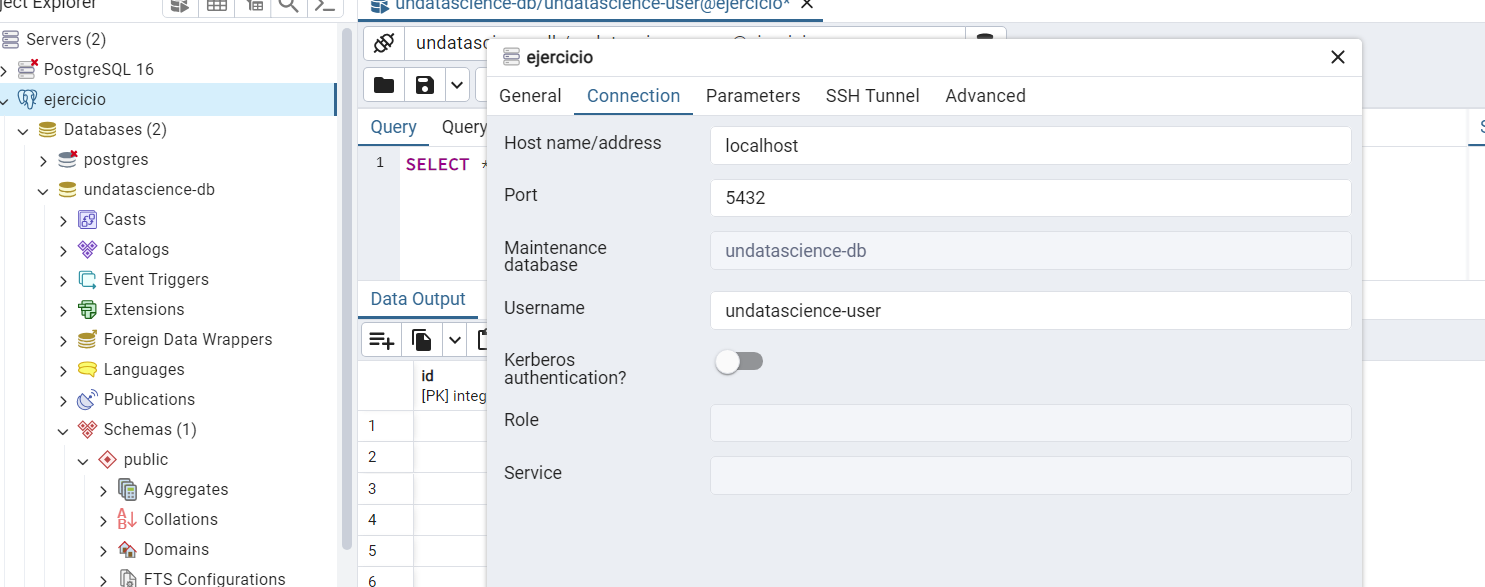

## Punto 4.

I) Crear la tabla nombrada: employees y explicar que tarea realiza la consulta realizada y mostrar en pantalla la tabla

In [1]:
import psycopg2
from psycopg2 import Error

In [2]:
connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

create_table_query = '''CREATE TABLE employees (
    employee_id INTEGER,
    first_name VARCHAR(20),
    last_name VARCHAR(25),
    email VARCHAR(25),
    phone_number VARCHAR(20),
    hire_date DATE,
    job_id VARCHAR(10),
    salary NUMERIC(8,2),
    commission_pct NUMERIC(2,2),
    manager_id INTEGER,
    department_id INTEGER,
    PRIMARY KEY (employee_id)
);'''

cursor.execute(create_table_query)
print("Table 'employees' created successfully")

cursor.execute("SELECT * FROM employees")
rows = cursor.fetchall()

print("\nTable 'employees':")
for row in rows:
    print(row)

connection.commit()
connection.close()


Table 'employees' created successfully

Table 'employees':


SELECT * FROM employees LIMIT 10;
Esta consulta selecciona todas las columnas de la tabla employees y muestra los primeros 10 registros.

SELECT count(1) FROM employees;
Esta consulta cuenta el número total de registros en la tabla employees. 

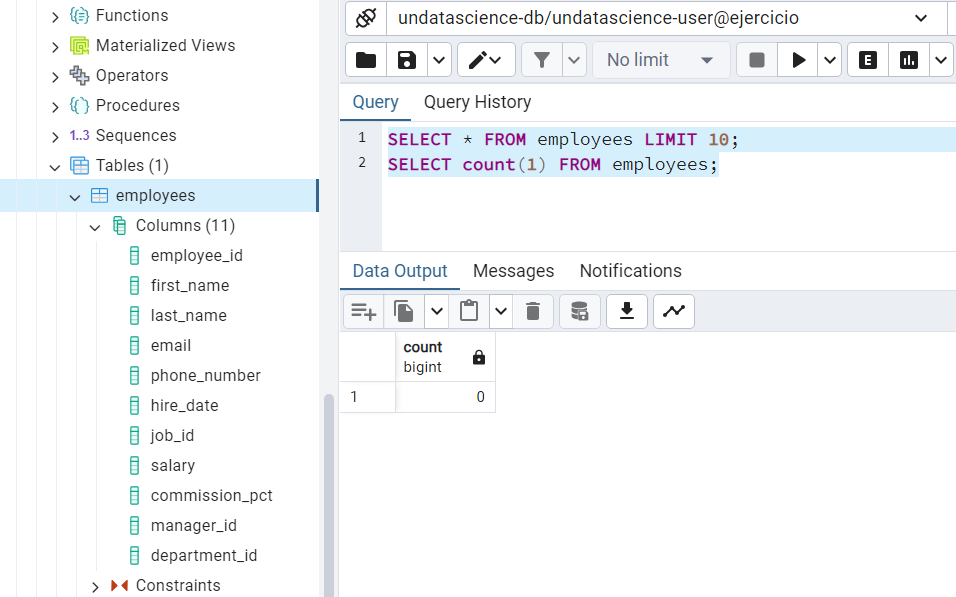

II) Crear la tabla courses

In [3]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

create_table_query = '''CREATE TABLE IF NOT EXISTS courses (
    course_id SERIAL PRIMARY KEY,
    course_name VARCHAR(60),
    course_author VARCHAR(40),
    course_status VARCHAR(20),
    course_published_dt DATE
);'''

cursor.execute(create_table_query)
print("Table 'courses' created successfully")

connection.commit()
connection.close()


Table 'courses' created successfully


III) Insertar datos

In [4]:
import psycopg2
from datetime import date

data_to_insert = [
    ("Programming using Python", "Bob Dillon", "published", date(2020, 9, 30)),
    ("Data Engineering using Python", "Bob Dillon", "published", date(2020, 7, 15)),
    ("Data Engineering using Scala", "Elvis Presley", "draft", None),
    ("Programming using Scala", "Elvis Presley", "published", date(2020, 5, 12)),
    ("Programming using Java", "Mike Jack", "inactive", date(2020, 8, 10)),
    ("Web Applications - Python Flask", "Bob Dillon", "inactive", date(2020, 7, 20)),
    ("Web Applications - Java Spring", "Mike Jack", "draft", None),
    ("Pipeline Orchestration - Python", "Bob Dillon", "draft", None),
    ("Streaming Pipelines- Python", "Bob Dillon", "published", date(2020, 10, 5)),
    ("Web Applications - Scala Play", "Elvis Presley", "inactive", date(2020, 9, 30)),
    ("Web Applications - Python Django", "Bob Dillon", "published", date(2020, 6, 23)),
    ("Server Automation - Ansible", "Uncle Sam", "published", date(2020, 7, 5))
]

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

insert_query = '''INSERT INTO courses (course_name, course_author, course_status, course_published_dt)
                  VALUES (%s, %s, %s, %s);'''

cursor.executemany(insert_query, data_to_insert)
print("Data inserted into 'courses' table successfully")

connection.commit()
connection.close()


Data inserted into 'courses' table successfully


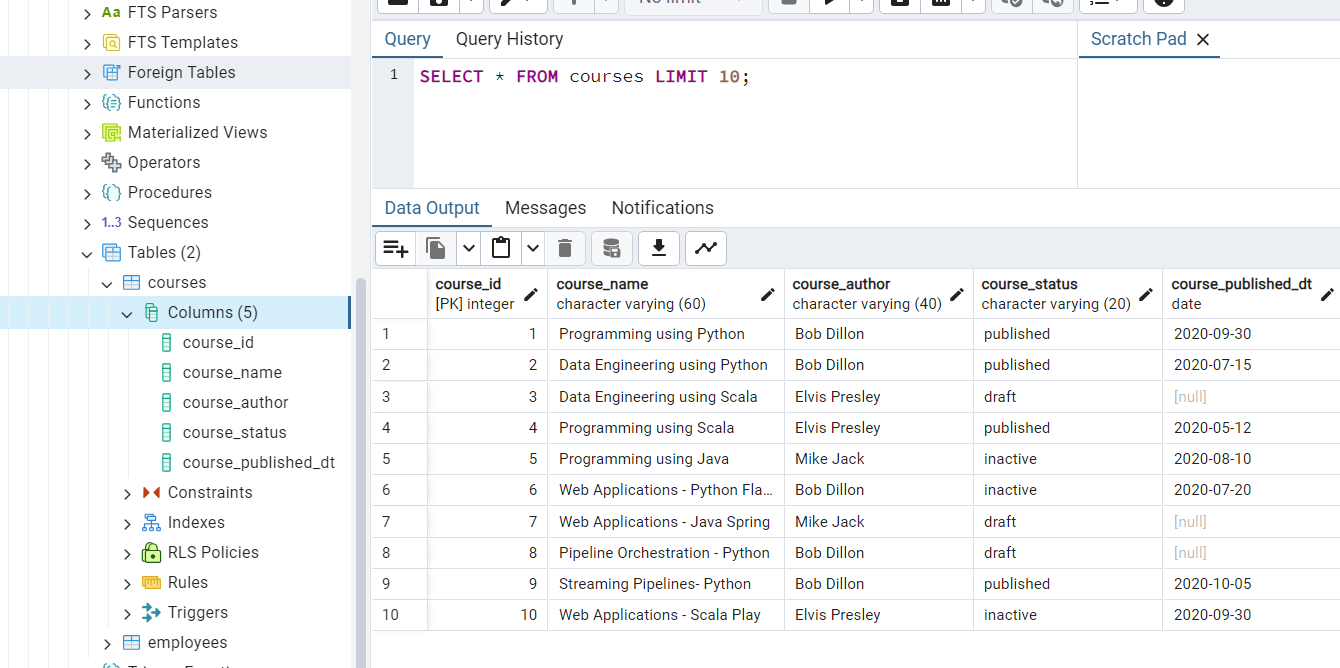

IV) Borre todos los cursos que no estén en modo borrador ni publicados. Proporcione la sentencia de borrado como respuesta para este ejercicio en el Jupyter Book. Para validar, obtenga el recuento de todos los cursos publicados por autor y asegúrese de que la salida está ordenada en forma descendente por recuento.

In [5]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

delete_query = '''DELETE FROM courses
                  WHERE course_status NOT IN ('draft', 'published');'''


cursor.execute(delete_query)
print("Courses not in draft or published status deleted successfully")

count_query = '''SELECT course_author, COUNT(*) AS course_count
                 FROM courses
                 WHERE course_status = 'published'
                 GROUP BY course_author
                 ORDER BY course_count DESC;'''

cursor.execute(count_query)
results = cursor.fetchall()

# Mostrar los resultados
print("\nCount of published courses by author (descending order):")
for row in results:
    print(row)

connection.commit()
connection.close()


Courses not in draft or published status deleted successfully

Count of published courses by author (descending order):
('Bob Dillon', 4)
('Elvis Presley', 1)
('Uncle Sam', 1)


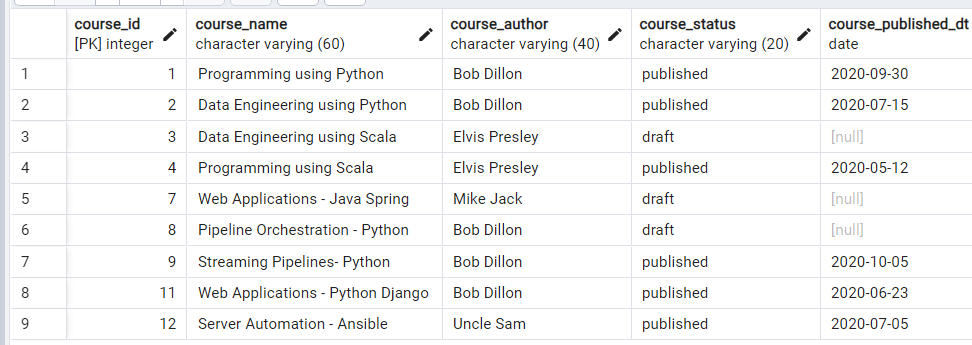

VI) Crear la base de datos users

In [6]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

create_table_query = '''CREATE TABLE users(
    user_id SERIAL PRIMARY KEY,
    user_first_name VARCHAR(30),
    user_last_name VARCHAR(30),
    user_email_id VARCHAR(50),
    user_gender VARCHAR(1),
    user_unique_id VARCHAR(15),
    user_phone_no VARCHAR(20),
    user_dob DATE,
    created_ts TIMESTAMP
);'''

cursor.execute(create_table_query)
print("Table 'users' created successfully")

connection.commit()
connection.close()


Table 'users' created successfully


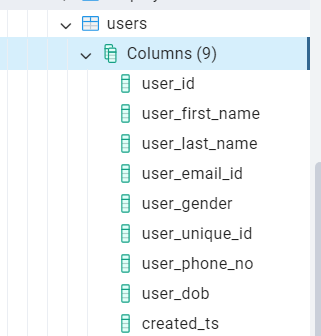

In [7]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

insert_query = '''
INSERT INTO users (
    user_first_name, user_last_name, user_email_id, user_gender, 
    user_unique_id, user_phone_no, user_dob, created_ts
) VALUES
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', NULL, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', NULL, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', NULL, '830-40-5287',
     NULL, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', NULL, '778-0845', 
     NULL, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28');
'''

cursor.execute(insert_query)
print("Valores insertados correctamente en la tabla 'users'")

connection.commit()
connection.close()


Valores insertados correctamente en la tabla 'users'


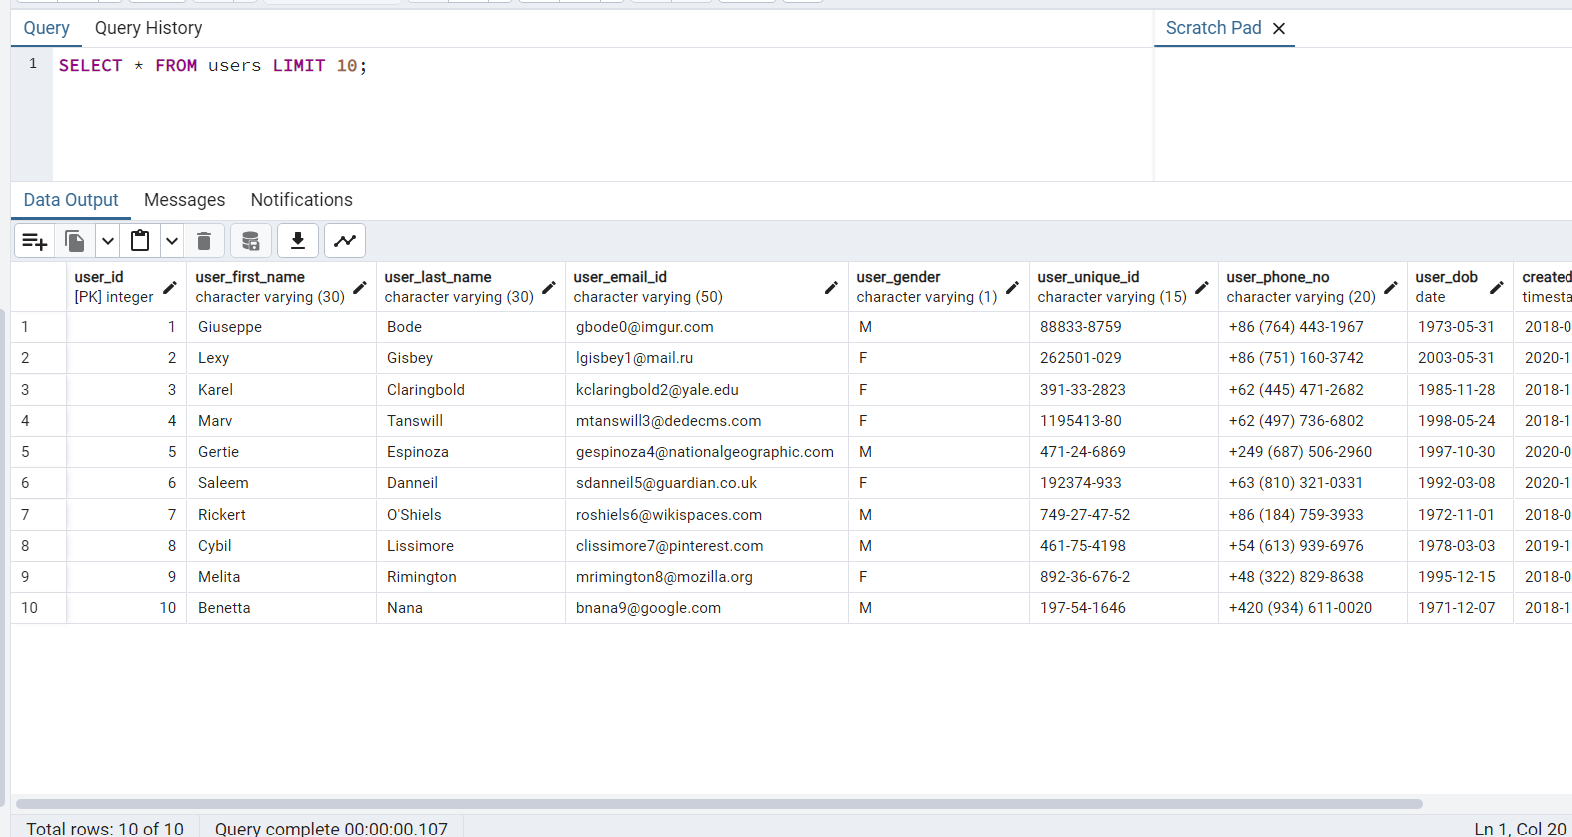

VII) Obtenga el número de usuarios creados por año. Utilice la tabla de usuarios para este ejercicio.

In [8]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

query = '''
SELECT 
    DATE_PART('year', created_ts) AS created_year,
    COUNT(*) AS user_count
FROM 
    users
GROUP BY 
    created_year
ORDER BY 
    created_year ASC;
'''

cursor.execute(query)

results = cursor.fetchall()

print("Año de Creación\tUsuario Count")
for row in results:
    created_year = row[0]
    user_count = row[1]
    print(f"{created_year}\t\t{user_count}")

connection.close()


Año de Creación	Usuario Count
2018.0		13
2019.0		4
2020.0		8


VIII) Obtenga los días de nacimiento de todos los usuarios nacidos en el mes May.

In [9]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

query = '''
SELECT
    user_id,
    user_dob,
    user_email_id,
    TO_CHAR(user_dob, 'Day') AS user_day_of_birth
FROM
    users
WHERE
    EXTRACT(MONTH FROM user_dob) = 5
ORDER BY
    EXTRACT(DAY FROM user_dob);
'''

cursor.execute(query)

results = cursor.fetchall()

print("User ID\tDOB\t\t\tUser Email\t\tUser Day of Birth")
print("-" * 100)

for row in results:
    user_id = str(row[0]).ljust(8)
    user_dob = str(row[1]).ljust(20)
    user_email = row[2].ljust(30)
    user_day_of_birth = row[3].ljust(15)
    print(f"{user_id}{user_dob}{user_email}{user_day_of_birth}")

connection.close()


User ID	DOB			User Email		User Day of Birth
----------------------------------------------------------------------------------------------------
4       1998-05-24          mtanswill3@dedecms.com        Sunday         
12      1983-05-26          uglayzerb@pinterest.com       Thursday       
1       1973-05-31          gbode0@imgur.com              Thursday       
2       2003-05-31          lgisbey1@mail.ru              Saturday       


IX) Obtenga los nombres e ids de correo electrónico de los usuarios añadidos en el año 2019.

In [10]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

query = '''
SELECT
    user_id,
    CONCAT(UPPER(user_first_name), ' ', UPPER(user_last_name)) AS user_name,
    user_email_id,
    created_ts,
    EXTRACT(YEAR FROM created_ts) AS created_year
FROM
    users
WHERE
    EXTRACT(YEAR FROM created_ts) = 2019
ORDER BY
    user_name;
'''

cursor.execute(query)

results = cursor.fetchall()

print("User ID\tUser Name\t\t\tUser Email\t\tCreated Timestamp\tCreated Year")
print("-" * 100)

for row in results:
    user_id = str(row[0]).ljust(8)
    user_name = row[1].ljust(25)
    user_email = row[2].ljust(30)
    created_ts = str(row[3]).ljust(25)
    created_year = str(row[4]).ljust(15)
    print(f"{user_id}{user_name}{user_email}{created_ts}{created_year}")

connection.close()


User ID	User Name			User Email		Created Timestamp	Created Year
----------------------------------------------------------------------------------------------------
8       CYBIL LISSIMORE          clissimore7@pinterest.com     2019-12-09 14:08:30      2019           
25      PHYLYS ASLIE             paslieo@qq.com                2019-10-01 01:34:28      2019           
12      UNA GLAYZER              uglayzerb@pinterest.com       2019-09-17 03:24:21      2019           
17      YANKEE JELF              yjelfg@wufoo.com              2019-09-16 16:09:12      2019           


X) Obtenga el número de usuarios por género. Utilice la tabla de users para este ejercicio.

In [11]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

query = '''
SELECT
    CASE
        WHEN user_gender = 'M' THEN 'Male'
        WHEN user_gender = 'F' THEN 'Female'
        ELSE 'Not Specified'
    END AS gender,
    COUNT(*) AS user_count
FROM
    users
GROUP BY
    user_gender
ORDER BY
    user_count DESC;
'''

cursor.execute(query)

results = cursor.fetchall()

print("Gender\t\tUser Count")
print("-" * 100)  

for row in results:
    gender = row[0].ljust(15)
    user_count = str(row[1]).ljust(10)
    print(f"{gender}{user_count}")

connection.close()

Gender		User Count
----------------------------------------------------------------------------------------------------
Female         13        
Male           10        
Not Specified  2         


XII) Obtenga los 4 últimos dígitos de los ids únicos.

In [12]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

query = '''
SELECT
    user_id,
    COALESCE(user_unique_id, 'Not Specified') AS user_unique_id,
    CASE
        WHEN user_unique_id IS NULL THEN 'Not Specified'
        WHEN LENGTH(REPLACE(user_unique_id, '-', '')) < 9 THEN 'Invalid Unique Id'
        ELSE RIGHT(REPLACE(user_unique_id, '-', ''), 4)
    END AS user_unique_id_last4
FROM
    users
ORDER BY
    user_id;
'''

cursor.execute(query)

results = cursor.fetchall()

print("User ID\tUser Unique ID\t\t\tUser Unique ID Last 4")
print("-" * 100) 

for row in results:
    user_id = str(row[0]).ljust(8)
    user_unique_id = row[1].ljust(25)
    user_unique_id_last4 = row[2].ljust(20)
    print(f"{user_id}{user_unique_id}{user_unique_id_last4}")

connection.close()


User ID	User Unique ID			User Unique ID Last 4
----------------------------------------------------------------------------------------------------
1       88833-8759               8759                
2       262501-029               1029                
3       391-33-2823              2823                
4       1195413-80               1380                
5       471-24-6869              6869                
6       192374-933               4933                
7       749-27-47-52             4752                
8       461-75-4198              4198                
9       892-36-676-2             6762                
10      197-54-1646              1646                
11      232-55-52-58             5258                
12      898-84-336-6             3366                
13      247-95-68-44             6844                
14      415-48-894-3             8943                
15      403-39-5-869             5869                
16      399-83-05-03             0503     

XIII) Obtenga el recuento de usuarios en función del código de país.

In [13]:
import psycopg2

connection = psycopg2.connect(user="undatascience-user",
                              password="undatascience-password",
                              host="localhost",
                              port="5432",
                              database="undatascience-db")
cursor = connection.cursor()

query = '''
SELECT
    CAST(SUBSTRING(user_phone_no FROM '\+(\d{1,3})') AS INT) AS country_code,
    COUNT(*) AS user_count
FROM
    users
WHERE
    user_phone_no IS NOT NULL
    AND user_phone_no <> ''
    AND user_phone_no ~* '^\+\d{1,3}'
GROUP BY
    country_code
ORDER BY
    country_code;
'''

cursor.execute(query)

results = cursor.fetchall()

print("Country Code\tUser Count")
print("-" * 100)
for row in results:
    country_code = str(row[0]).ljust(15)
    user_count = str(row[1]).ljust(10)
    print(f"{country_code}{user_count}")

connection.close()

Country Code	User Count
----------------------------------------------------------------------------------------------------
1              1         
7              2         
48             1         
54             1         
55             1         
62             3         
63             1         
81             1         
84             1         
86             4         
229            1         
249            1         
351            1         
370            1         
380            1         
420            1         
598            1         


## Punto 5. 

In [1]:
import sqlite3
import pandas as pd
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"sqlitedb.db")

2.6.0


In [2]:
df_ADA = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv")
df_ADA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [3]:
df_ADA = df_ADA.rename({'Date': 'date', 
               'Open': 'open', 
               'High': 'high', 
               'Low': 'low', 
               'Close': 'close', 
               'Adj Close': 'adj_close', 
               'Volume': 'volume'}, axis=1)
df_ADA.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [4]:
names_list = df_ADA.columns.tolist()
names_list

['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

In [5]:
import sqlalchemy
from sqlalchemy import create_engine

In [6]:
engine = create_engine('sqlite:///sqlitedb.db')
df_ADA.to_sql('ADA', engine, if_exists = 'replace', index=False, method='multi')
engine.dispose()

In [7]:
connection = sqlite3.connect('sqlitedb.db')

cursor = connection.cursor()
cursor.execute("SELECT * FROM ADA;")
close = cursor.fetchall()
ADA_sql = pd.DataFrame(close)
display(ADA_sql.head())

ADA_names = []
cnames_list = cursor.execute('''SELECT * FROM ADA''') 
for column in cnames_list.description: 
    ADA_names.append(column[0])
    
display(ADA_names)
print("\nOperation done successfully")
connection.close()

,0,1,2,3,4,5,6
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


Operation done successfully


In [8]:
ADA_sql.columns = names_list 
ADA_sql = ADA_sql.sort_values(by = "date")
ADA_sql.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


### Candlestick Chart

In [9]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Candlestick(x=ADA_sql['date'],
                                     open=ADA_sql['open'],
                                     high=ADA_sql['high'],
                                     low=ADA_sql['low'],
                                     close=ADA_sql['close'])])

fig.update_layout(title='Cardano USD (ADA-USD) Candlestick Chart',
                  xaxis_title='Day',
                  yaxis_title='ADA-USD')

fig.show()

### EDA

Se describe un DataFrame con 7 columnas y 1475  filas. Las columnas contienen datos de diferentes tipos, principalmente float64(números decimales) y object.

In [10]:
ADA_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1475 non-null   object 
 1   open       1471 non-null   float64
 2   high       1471 non-null   float64
 3   low        1471 non-null   float64
 4   close      1471 non-null   float64
 5   adj_close  1471 non-null   float64
 6   volume     1471 non-null   float64
dtypes: float64(6), object(1)
memory usage: 80.8+ KB


Los precios (open, high, low, close, adj_close) muestran una variabilidad considerable, como se evidencia por las desviaciones estándar relativamente altas en comparación con las medias.
El rango de los precios (min-max) indica que hubo momentos de alta volatilidad en el mercado de ADA.
Los valores máximos (max) para open, high, low, close, y adj_close son significativamente más altos que los valores al 75%, lo que sugiere la presencia de outliers o momentos de precios excepcionalmente altos.
Los volúmenes también muestran una gran variabilidad, con un rango amplio y una desviación estándar alta en comparación con la media.
En general, parece haber periodos de alta actividad en el mercado, como lo indican los valores máximos de volume.

In [11]:
ADA_sql.describe()

,open,high,low,close,adj_close,volume
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03
mean,0.374234,0.393359,0.354385,0.375726,0.375726,1.090947e+09
std,0.609602,0.639195,0.578952,0.611501,0.611501,2.258370e+09
min,0.018414,0.021050,0.017354,0.018539,0.018539,1.739460e+06
25%,0.047560,0.049503,0.046073,0.047592,0.047592,5.366896e+07
50%,0.093398,0.096776,0.090105,0.093434,0.093434,1.359691e+08
75%,0.301339,0.318211,0.283567,0.301889,0.301889,6.999972e+08
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


Validamos la cantidad de registros únicos en cada columna del DataFrame

In [12]:
ADA_sql.nunique()

date         1475
open         1468
high         1465
low          1463
close        1467
adj_close    1467
volume       1471
dtype: int64

Se verifica que el DataFrame contiene valores nulos, en las columnas open, high, low, close, adj_close, volume.

In [13]:
ADA_sql.isnull().sum()

date         0
open         4
high         4
low          4
close        4
adj_close    4
volume       4
dtype: int64

c:\Users\Andres\psqlpy_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



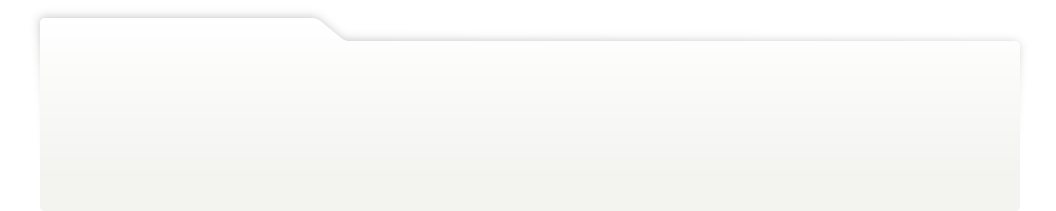
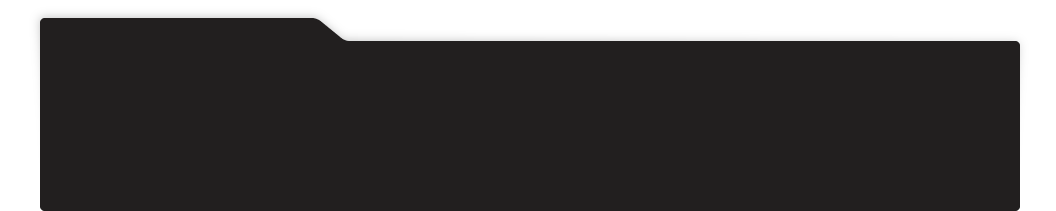
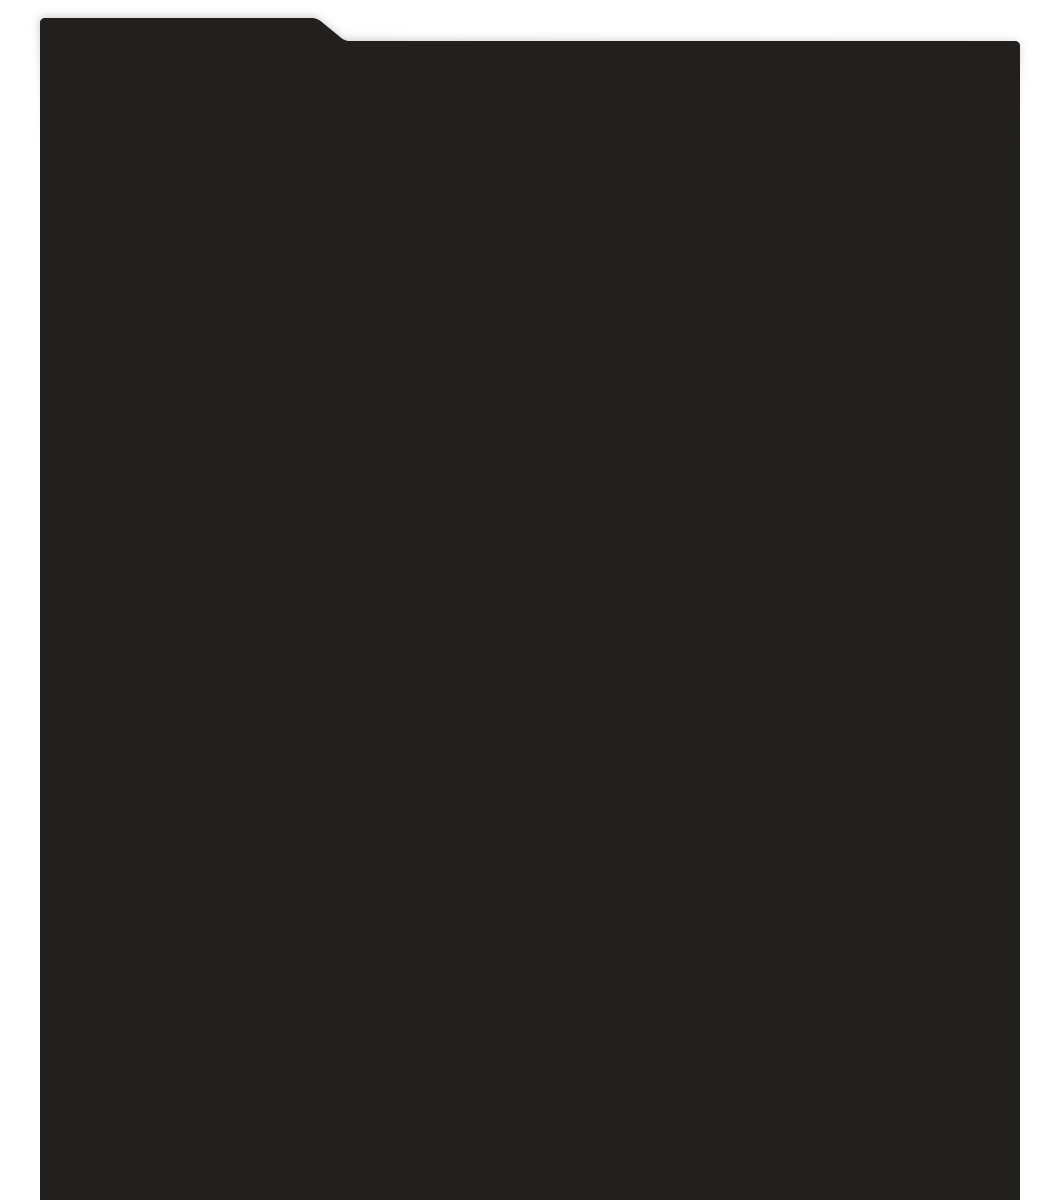
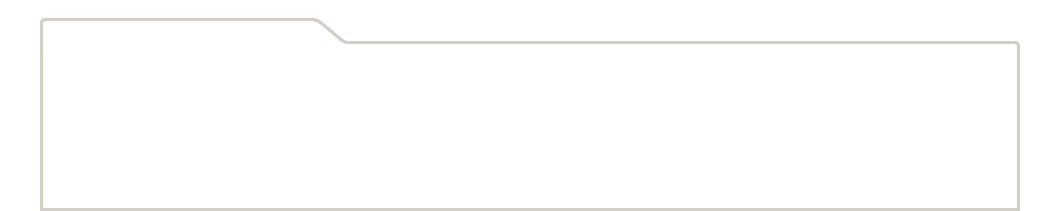
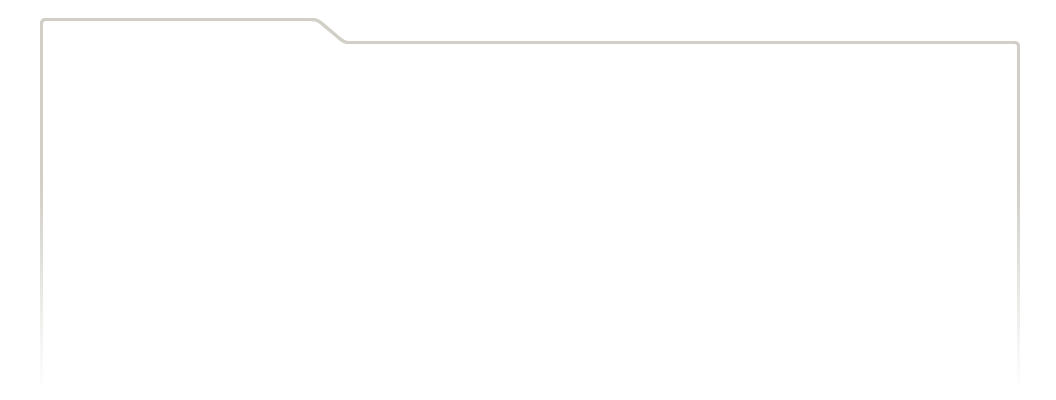
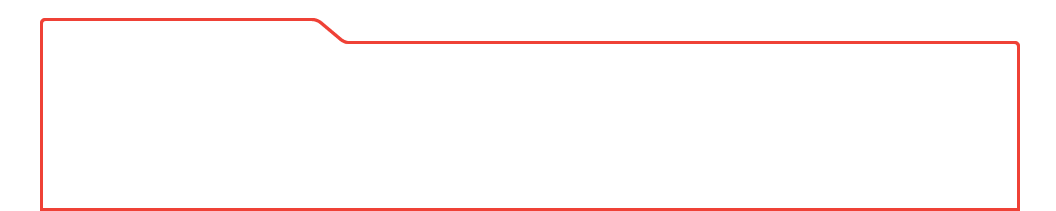
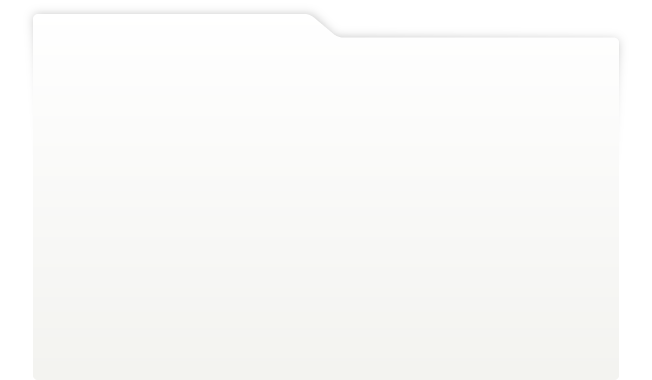
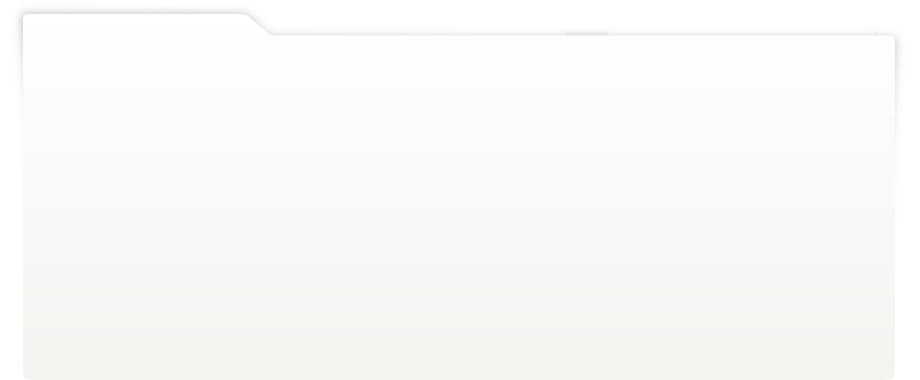
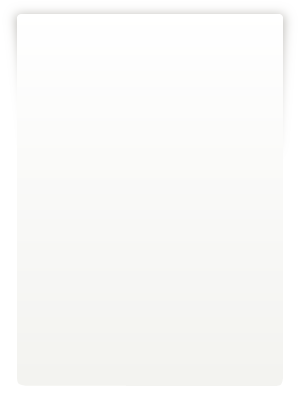
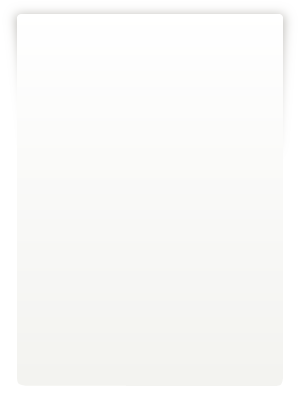
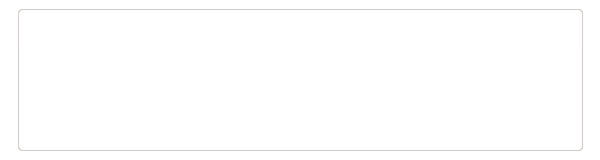
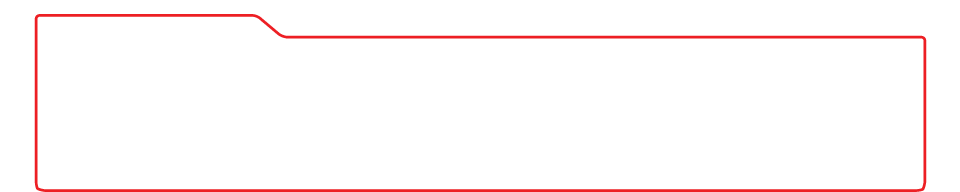
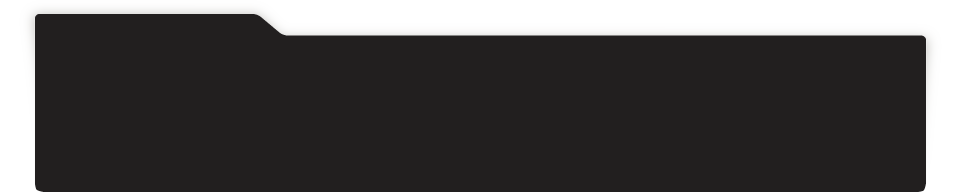
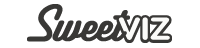
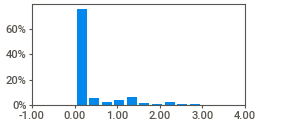
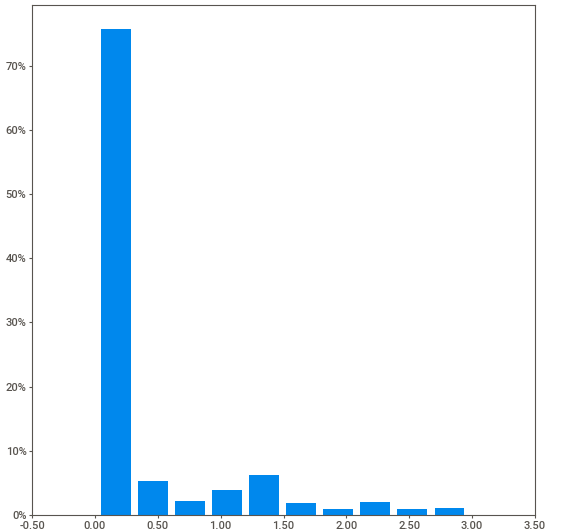
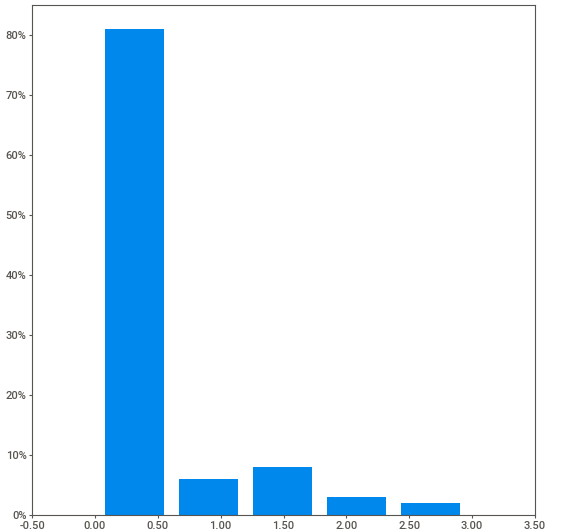
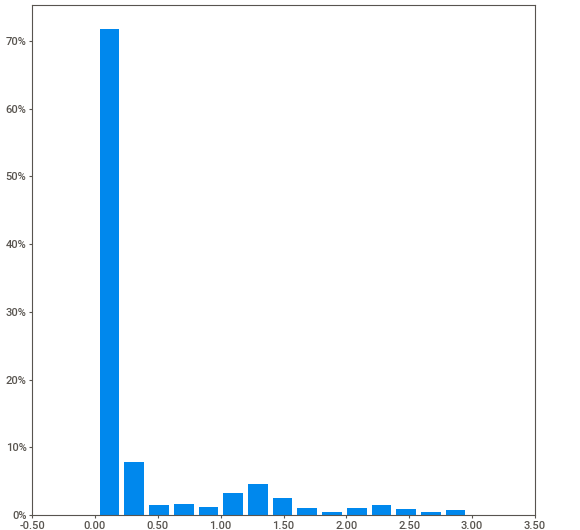
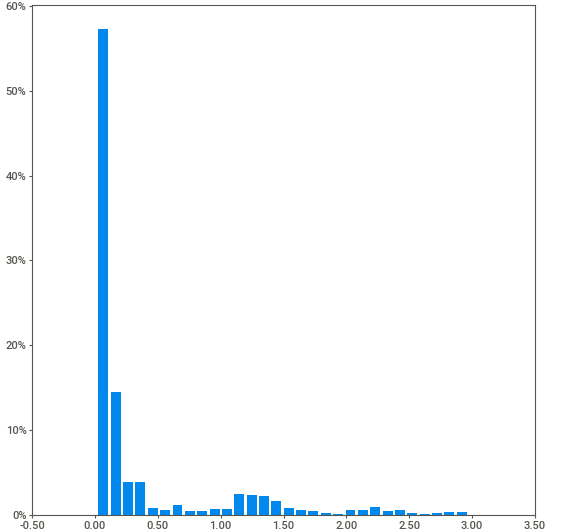
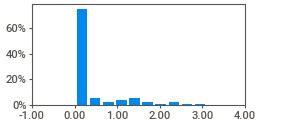
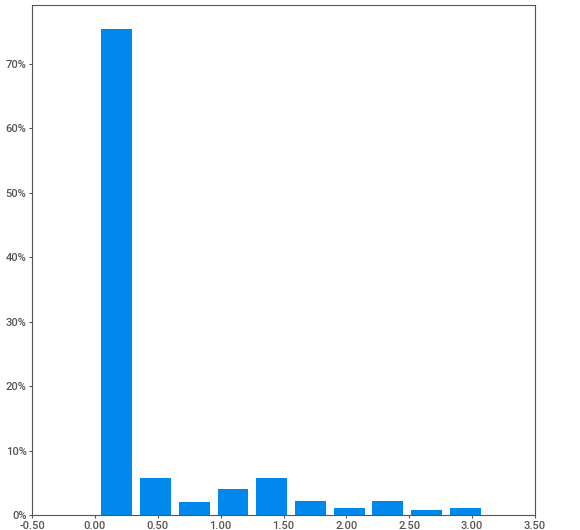
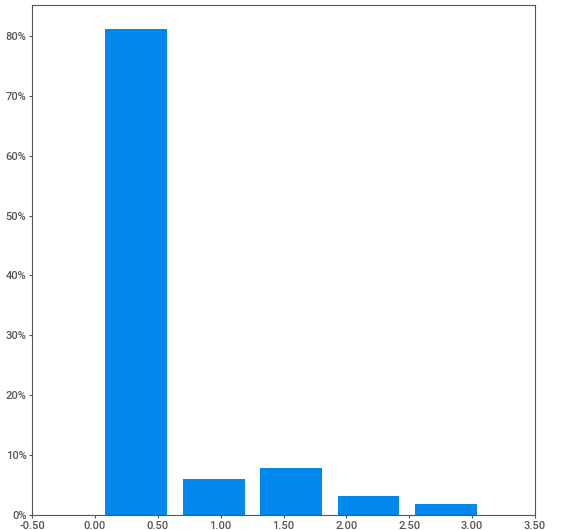
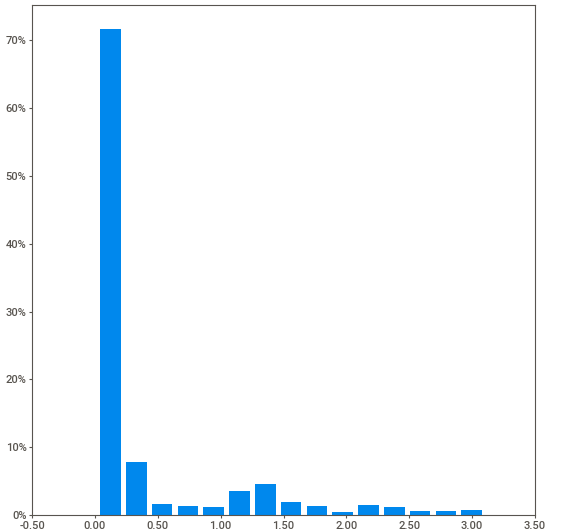
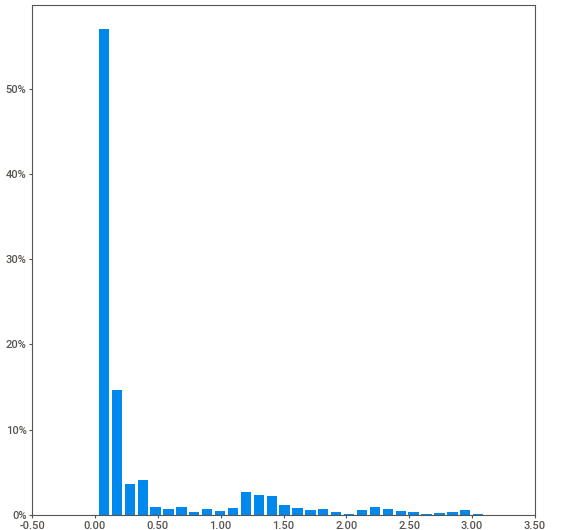
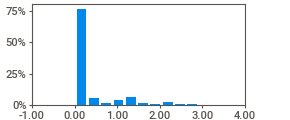
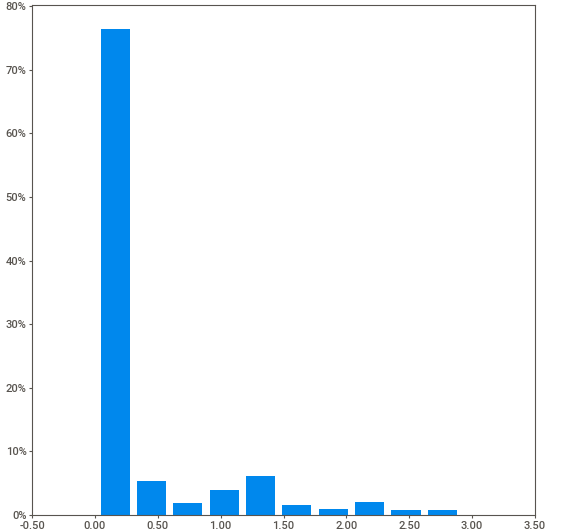
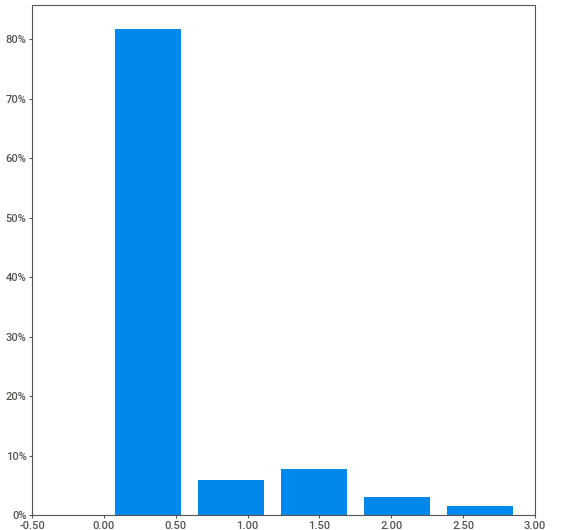
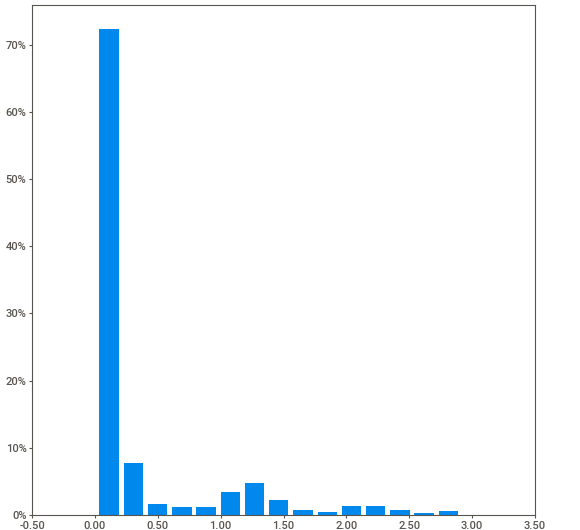
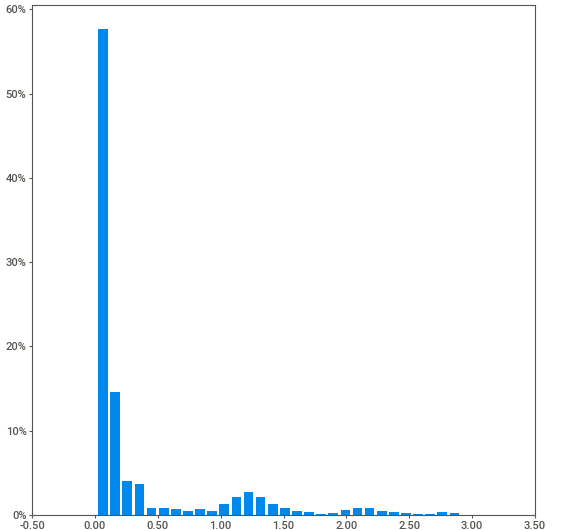
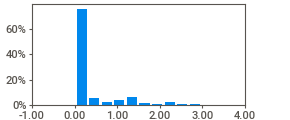
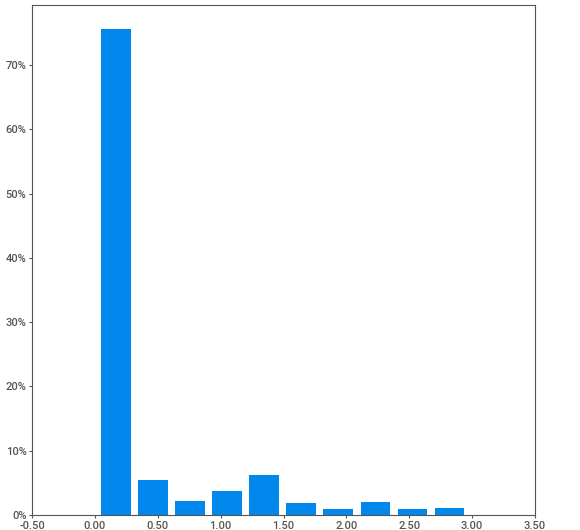
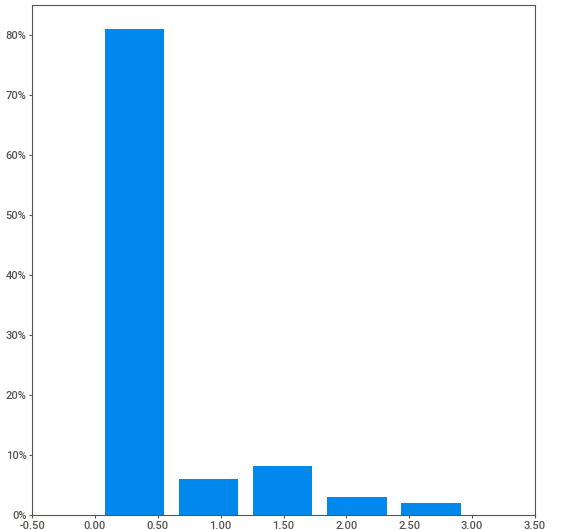
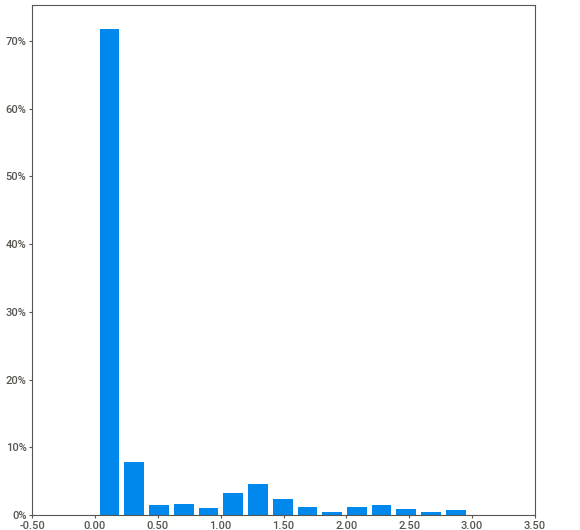
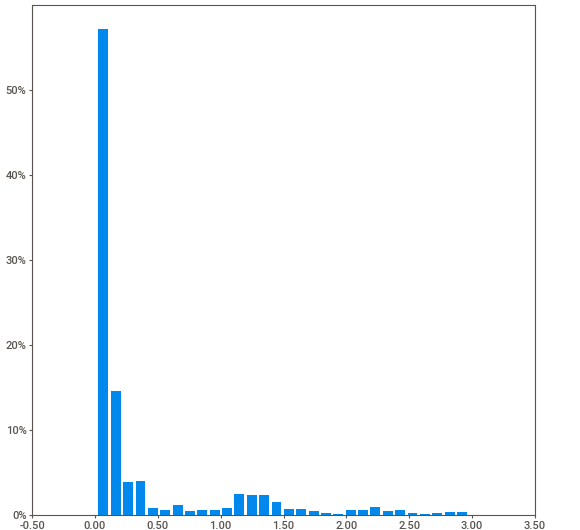
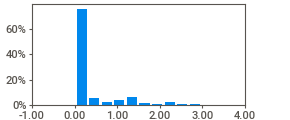
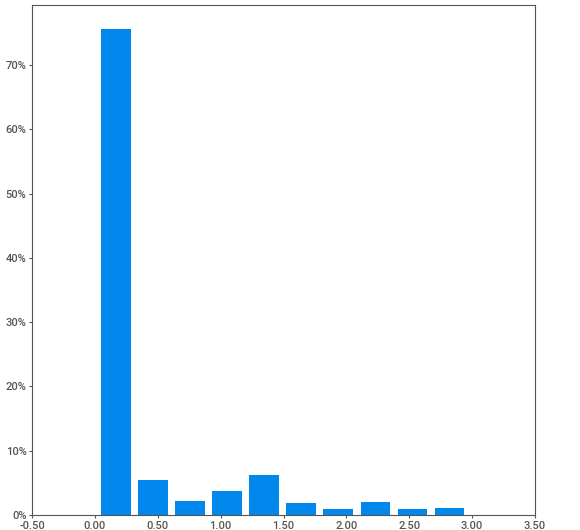
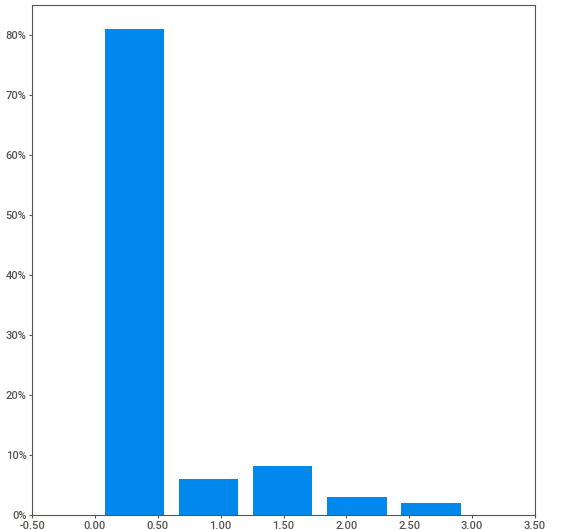
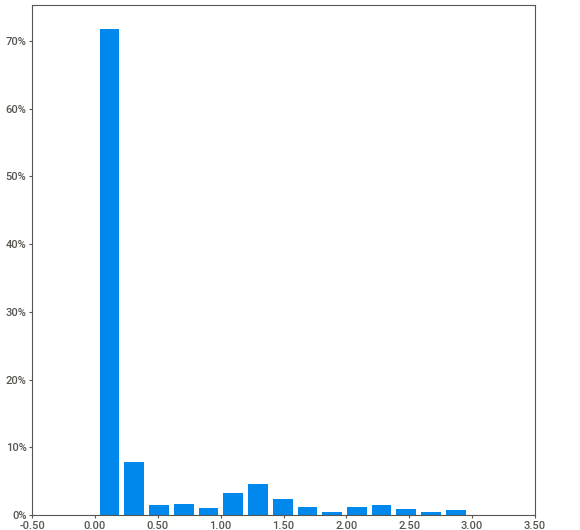
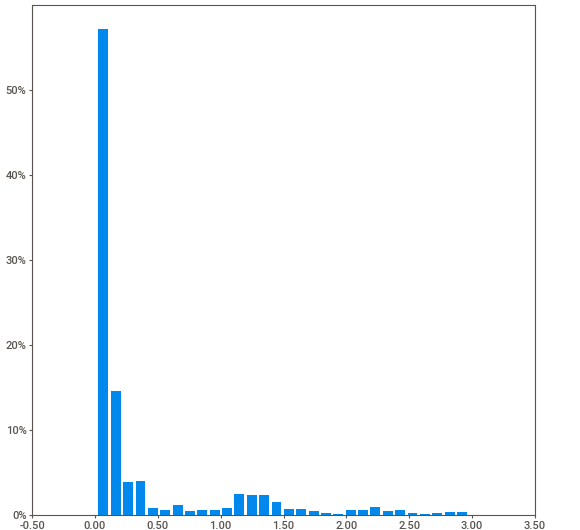
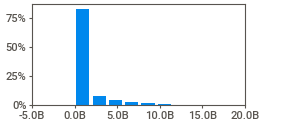
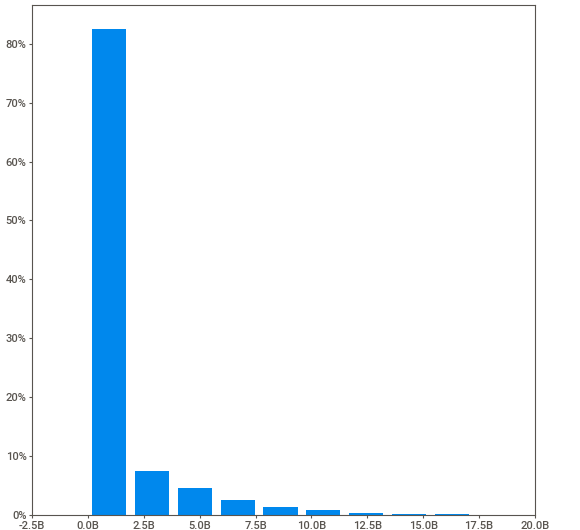
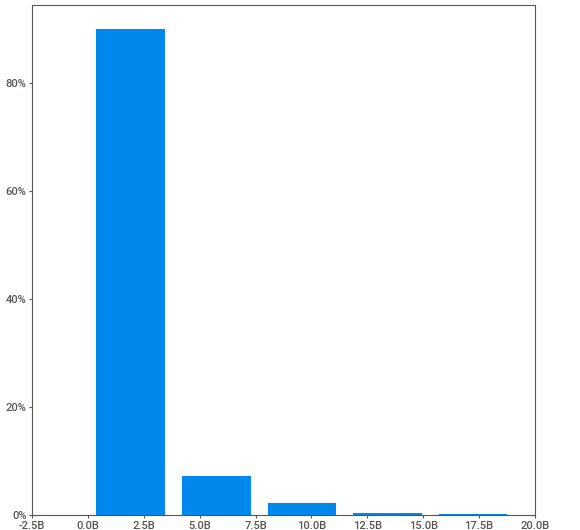
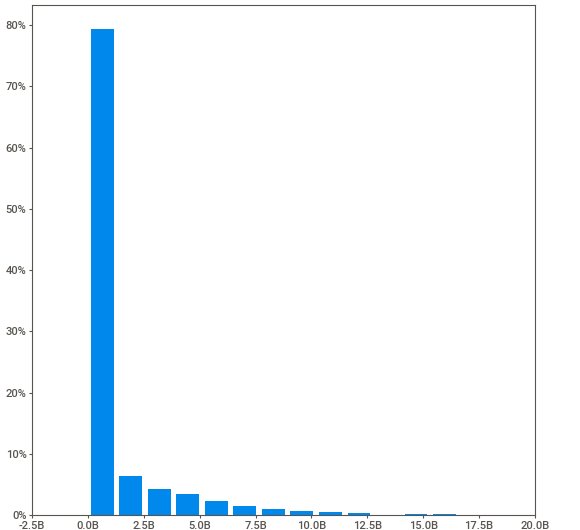
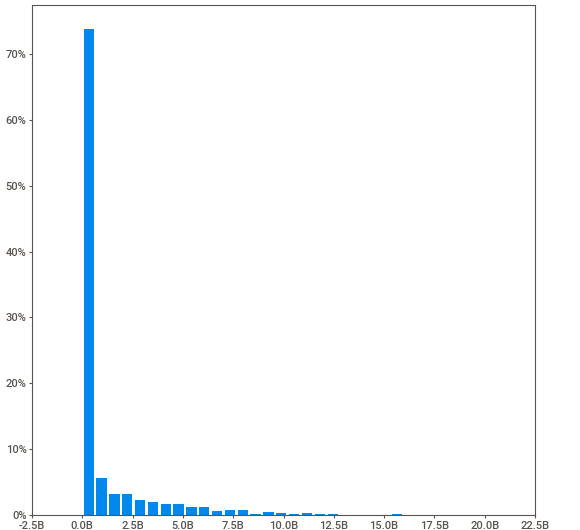
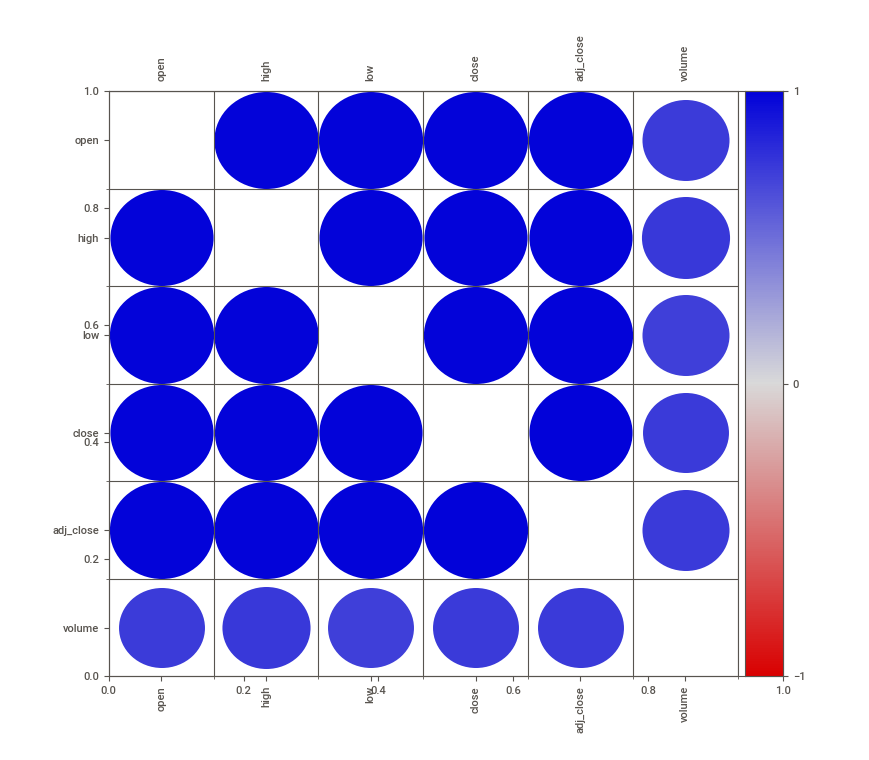
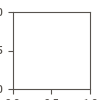

In [15]:
import sweetviz as sv
svdf =sv.analyze(ADA_sql)
svdf.show_notebook()

Podemos ver que hay un aumento de precios para ADA en 2021, lo que implica que todos son una buena inversión.

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

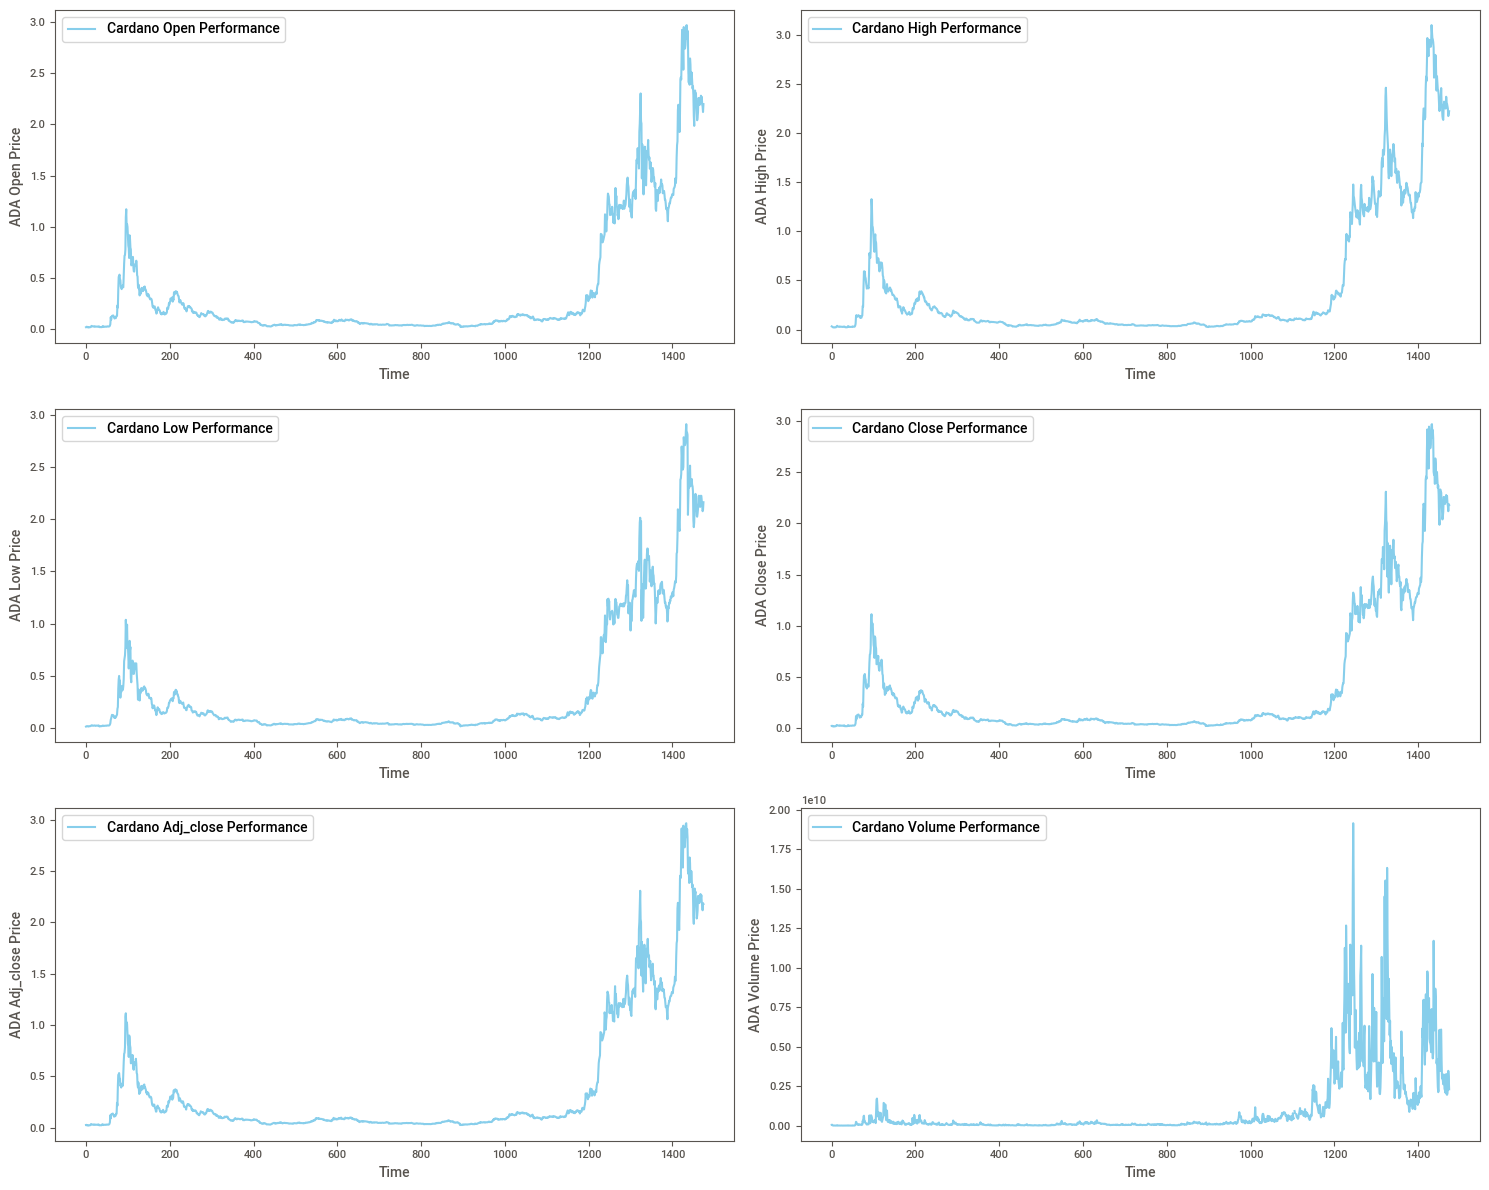

In [17]:
import matplotlib.pyplot as plt

def gplot(ax, data, price, label, ylabel, color):
    ax.plot(data.index, data[price], label=label, color=color)
    ax.legend()
    ax.set_xlabel("Time")
    ax.set_ylabel(ylabel)

f = plt.figure(figsize=(15, 12))

columns_to_plot = ["open", "high", "low", "close", "adj_close", "volume"]

for i, col in enumerate(columns_to_plot, start=1):
    ax = f.add_subplot(3, 2, i)
    gplot(ax, ADA_sql, col, f"Cardano {col.capitalize()} Performance", f"ADA {col.capitalize()} Price", "skyblue")

plt.tight_layout()

plt.show()


In [24]:
ADA_sql['date'] = pd.to_datetime(ADA_sql['date'])
ADA_sql.set_index('date', inplace=True)
def mini_data(data):
    df=data[["close","low","high","open"]]
    return df

ada1_mini=mini_data(ADA_sql)

In [25]:
from scipy import stats
ada_month=ada1_mini.resample("M").mean()
ada_month["close_box"], lmbda=stats.boxcox(ada_month.close)

C:\Users\Andres\AppData\Local\Temp\ipykernel_1536\3795962630.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Descomposición Estacionaria: Se separa la serie temporal en sus componentes principales: tendencia, estacionalidad y residuo (o componente irregular). La idea es descomponer la serie en estas partes para comprender mejor su comportamiento y patrones subyacentes.

Serie Original: Es la serie temporal original sin ninguna transformación.

Tendencia: Muestra la dirección general de los datos a largo plazo, ignorando las fluctuaciones estacionales y aleatorias. Los datos tienen una tendencia creciente a lo largo del tiempo.

Estacionalidad: Representa los patrones que se repiten a intervalos regulares. Se pueden identificar ciclos o patrones que se repiten en ciertos períodos de tiempo.

Residuo (Componente Irregular): Es lo que queda después de que se hayan eliminado la tendencia y la estacionalidad. Representa la variabilidad que no se puede explicar por la tendencia ni por la estacionalidad. Un residuo ideal debería parecerse a ruido blanco, es decir, no debe tener patrones reconocibles.

C:\Users\Andres\AppData\Local\Temp\ipykernel_1536\701762445.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



ADA Seasonal Decomposition


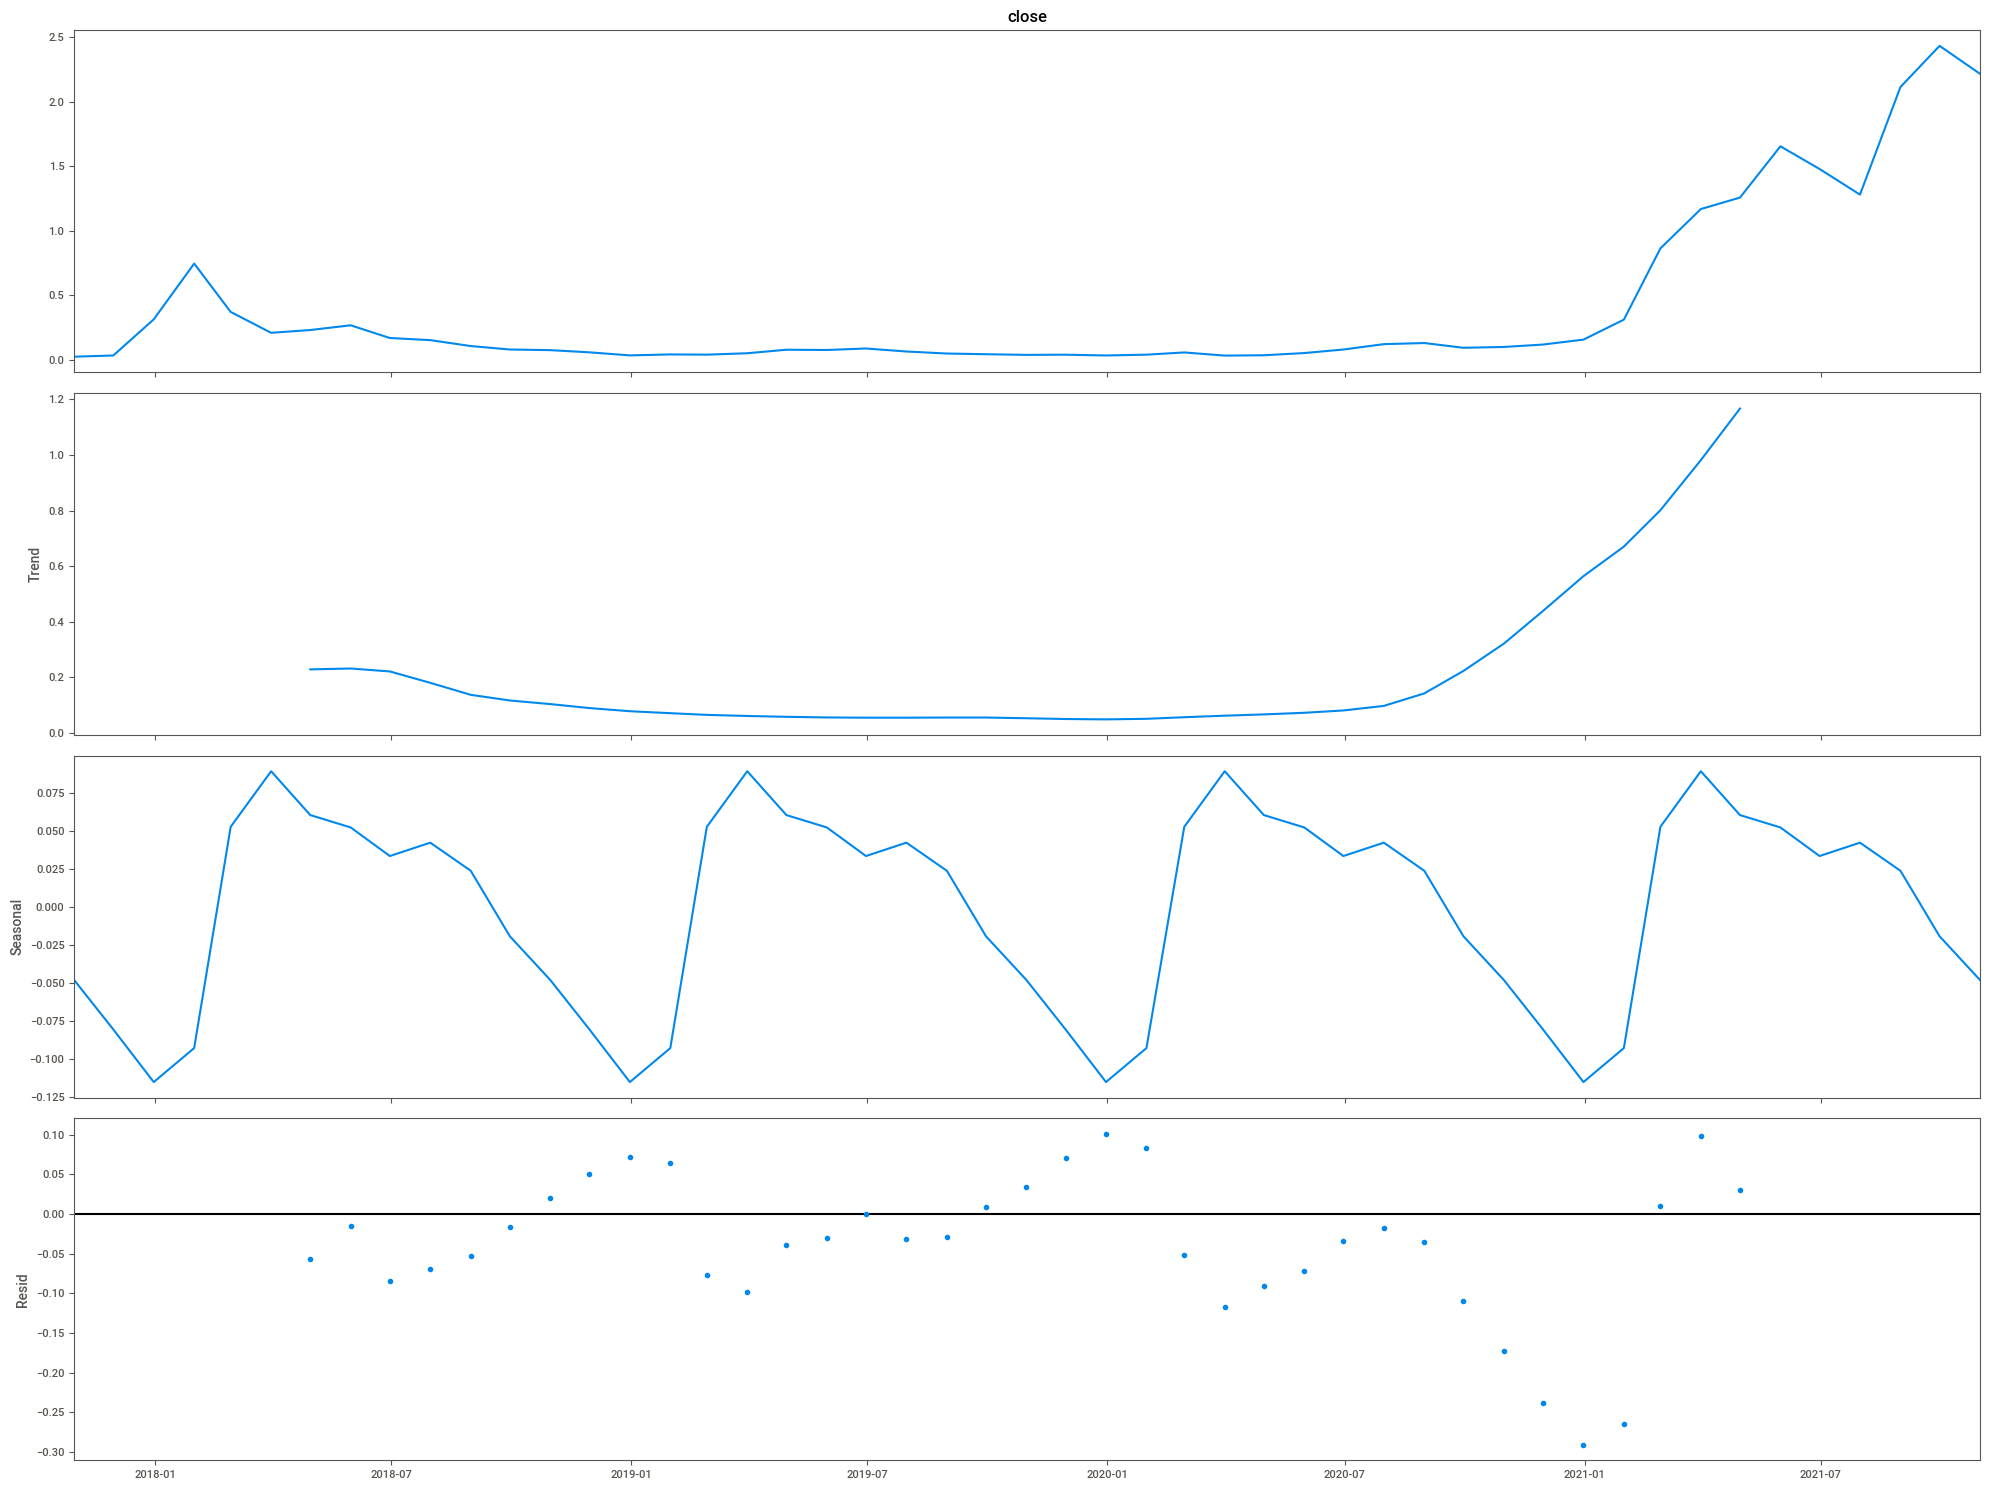

In [26]:
plt.rcParams["figure.figsize"]=(20,15)

def season_df(data, label):
    df=data.resample("M").mean()
    seasonal_decompose(df.close).plot()
    print(label)
    return plt.show()

season_df(data=ada1_mini, label="ADA Seasonal Decomposition")

Box - Cox Transformation
Esta transformación es útil cuando los datos muestran una varianza que cambia con el nivel de los datos. Al transformar los datos, se busca hacer que la varianza sea más constante. También se utiliza para hacer que los datos se aproximen más a una distribución normal.

In [27]:
ada_month=ada1_mini.resample("M").mean()
ada_month["close_box"], lmbda=stats.boxcox(ada_month.close)

C:\Users\Andres\AppData\Local\Temp\ipykernel_1536\2132941290.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [28]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [29]:
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(ada_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [30]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

  parameters         aic
1     (0, 1)  141.744687
4     (1, 1)  142.280304
2     (0, 2)  142.411059
6     (2, 0)  143.480131
3     (1, 0)  143.572433
                               SARIMAX Results                                
Dep. Variable:              close_box   No. Observations:                   49
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -68.872
Date:                Sun, 07 Apr 2024   AIC                            141.745
Time:                        16:47:18   BIC                            145.487
Sample:                    10-31-2017   HQIC                           143.159
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4606      0.151      3.053      0.002      

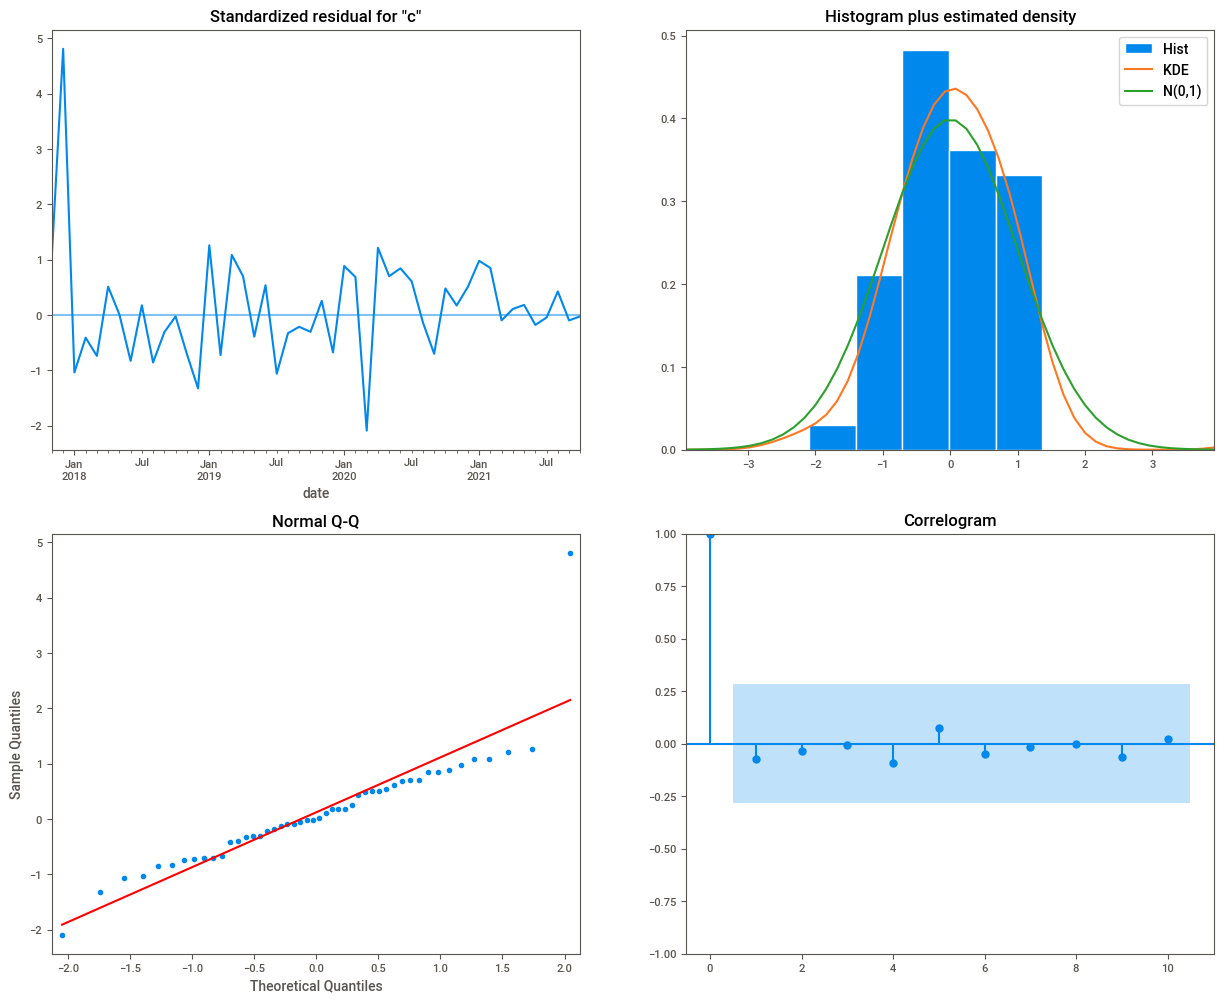

In [31]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()